# Explore here

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge




df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")


df


# Vemos que es un conjunto de datos con muchas características. 

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


## EDA

In [165]:
df.isnull().any().sum()

# vemos que no hay ningún nulo

np.int64(0)

In [166]:
df.drop_duplicates().reset_index(drop = True)
#vemos que tampoco hay duplicados

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [167]:
df.describe()

# son demasiados parámetros parámetros y algunos algo complejos como para sacar información relevante así. 

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [168]:
df['anycondition_prevalence'].describe()

count    3140.000000
mean       46.793917
std         6.379448
min        22.000000
25%        42.900000
50%        47.200000
75%        51.000000
max        66.200000
Name: anycondition_prevalence, dtype: float64

In [169]:
#buscamos valores objeto dentro de todas las características

for i in df:
    if df[i].dtype == 'object':
         print (i)

COUNTY_NAME
STATE_NAME


In [170]:
df['anycondition_prevalence']

#vamos a elegir anycondition_prevalence como variable dependiente. Prefiero que sea un ratio que un valor absoluto 

0       47.6
1       40.2
2       57.5
3       51.6
4       46.3
        ... 
3135    40.3
3136    24.3
3137    42.2
3138    37.5
3139    46.0
Name: anycondition_prevalence, Length: 3140, dtype: float64

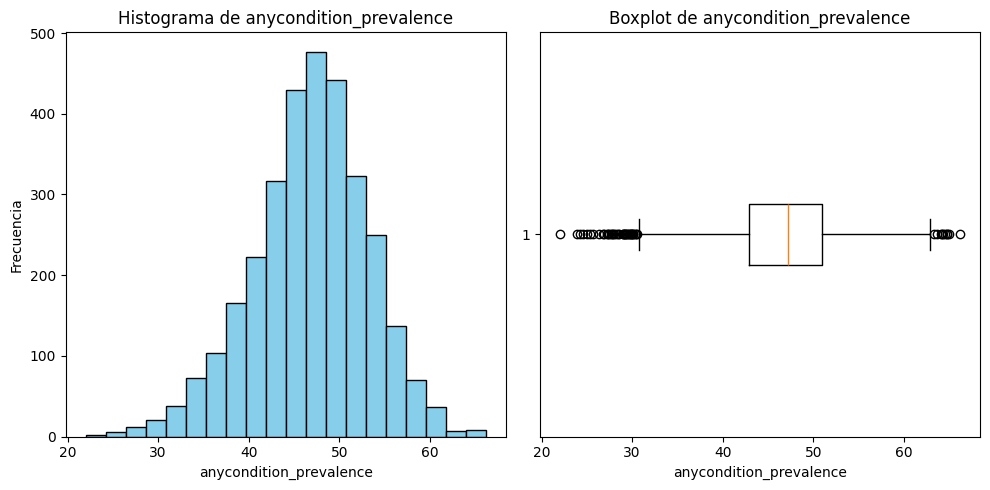

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['anycondition_prevalence'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de anycondition_prevalence')
ax[0].set_xlabel('anycondition_prevalence')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['anycondition_prevalence'], vert=False)
ax[1].set_title('Boxplot de anycondition_prevalence')
ax[1].set_xlabel('anycondition_prevalence')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [172]:


# Vamos a aplicar este codificador que he leído que tiene sentido para regresión lineal.
encoder = ce.TargetEncoder(cols=['COUNTY_NAME', 'STATE_NAME'])

df_encoded = encoder.fit_transform(df[['COUNTY_NAME', 'STATE_NAME']], df['anycondition_prevalence'])

# Renombrar las columnas codificadas
df_encoded = df_encoded.rename(columns={
    'COUNTY_NAME': 'COUNTY_NAME_int',
    'STATE_NAME': 'STATE_NAME_int'})

# Concatenar el DataFrame original con las columnas codificadas
df_num = pd.concat([df, df_encoded], axis=1)
df_num = df_num.drop(['COUNTY_NAME', 'STATE_NAME'], axis=1)
# Ver el DataFrame final con las columnas renombradas
df_num

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,COUNTY_NAME_int,STATE_NAME_int
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,11.9,13.8,5462,3.1,2.9,3.3,1326,3,46.898795,52.970686
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,20520,3.2,3.0,3.5,5479,4,46.475615,52.970686
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,18.6,20.6,3870,4.5,4.2,4.8,887,6,48.340957,52.970686
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,13.2,14.9,2511,3.3,3.1,3.6,595,2,47.369277,52.970686
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,12.6,14.5,6017,3.4,3.2,3.7,1507,2,46.901168,52.970686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,8.3,9.6,2834,2.6,2.4,2.8,821,5,45.949004,42.286789
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,6.5,8.0,1360,2.4,2.2,2.6,447,5,44.606599,42.286789
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,9.5,11.2,1500,3.0,2.8,3.2,430,5,46.196210,42.286789
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,10.3,12.1,686,3.4,3.2,3.7,207,6,45.584700,42.286789


In [173]:
#vamos a intentar eliminal outliers con criterio 3 sigma

mean_value = df_num['anycondition_prevalence'].mean()
std_value = df_num['anycondition_prevalence'].std()

# Filtrar las filas que tengan valores por encima del umbral
df_num_filter = df_num[(df['anycondition_prevalence'] >= (mean_value - 3 * std_value)) & 
                 (df_num['anycondition_prevalence'] <= (mean_value + 3 * std_value))]

print(f" hemos eliminado {df_num.shape[0] - df_num_filter.shape[0]} filas por ser considerados outiers según el criterio 3 sigma")

 hemos eliminado 14 filas por ser considerados outiers según el criterio 3 sigma


In [174]:
df_num_filter =  df_num_filter.reset_index(drop=True)

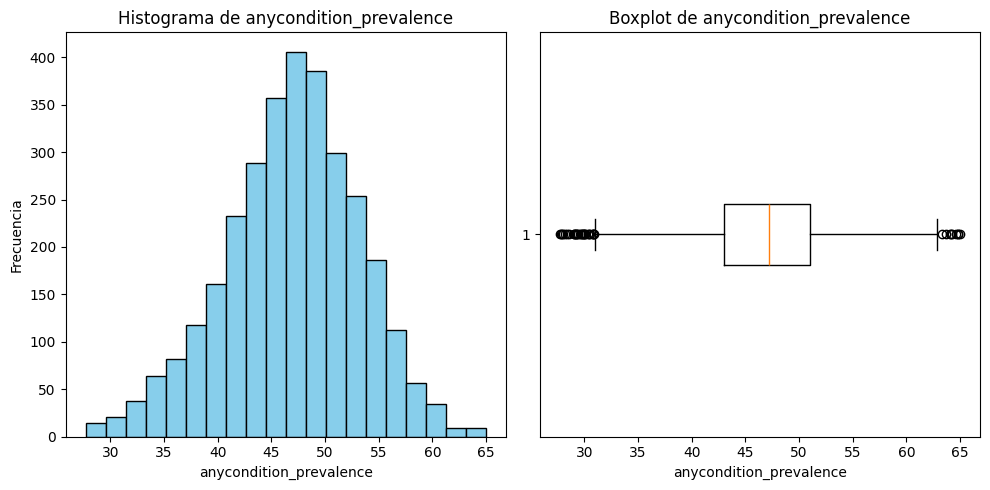

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df_num_filter['anycondition_prevalence'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de anycondition_prevalence')
ax[0].set_xlabel('anycondition_prevalence')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df_num_filter['anycondition_prevalence'], vert=False)
ax[1].set_title('Boxplot de anycondition_prevalence')
ax[1].set_xlabel('anycondition_prevalence')

# Mostrar la figura
plt.tight_layout()
plt.show()

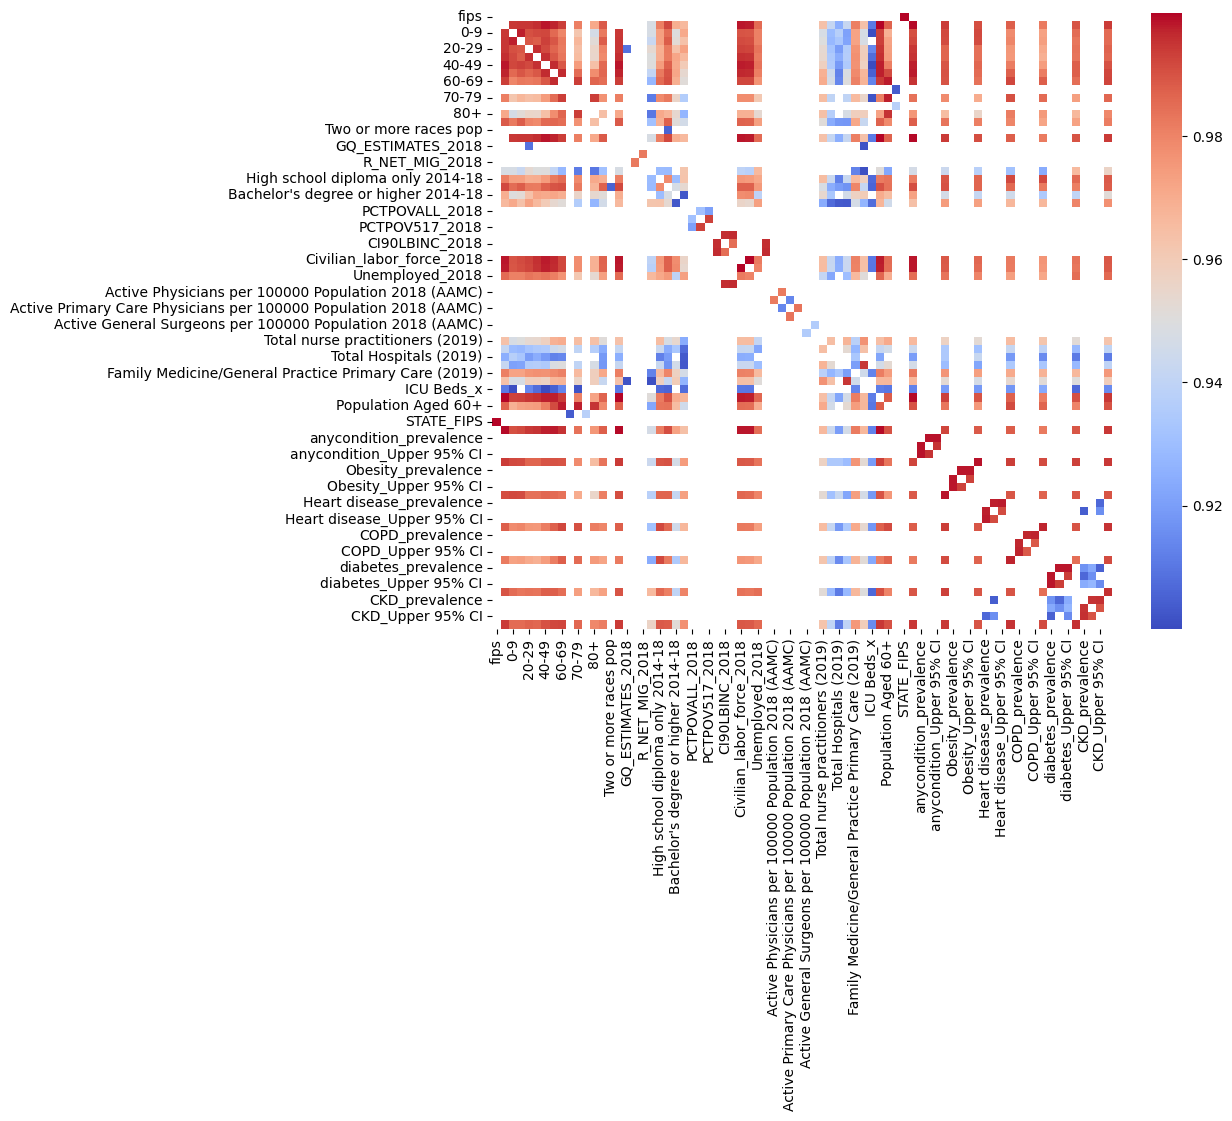

In [176]:
matriz_correlacion = df_num_filter.corr()

umbral = 0.9  # Umbral para correlaciones altas
strong_corr = matriz_correlacion[abs(matriz_correlacion) > umbral]
strong_corr_identi = strong_corr.replace(1, np.nan)

strong_corr_filter = strong_corr_identi.dropna(axis=0, how="all").dropna(axis=1, how="all")

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr_filter, annot=False, cmap="coolwarm", fmt=".2f")


plt.show()

He limitado el número de filas y columnas para que solo aparezcan las correlaciones por encima del umbral. No da mucha info pero es lo mejor que he conseguido. Siendo un dataset tan correlacionado es difícil ir al detalle. Lo que sí nos ha dicho es que es un dataset con muchas correlaciones. 

In [177]:
df_num_filter.isnull().any().sum()

np.int64(0)

In [178]:
#separamos variables

X = df_num_filter.drop(['anycondition_prevalence'], axis=1)
y = df_num_filter['anycondition_prevalence']

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

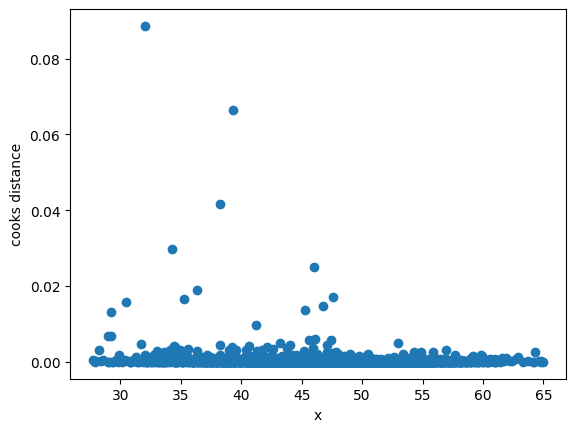

In [179]:
plt.scatter(y, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('cooks distance')
plt.show()

In [180]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df_num_filter)
# valores por encima del pto de corte
np.sum(cooks_distance[0] >= pto_corte)

print(f" con este criterio un {(len(np.where(cooks_distance[0]>pto_corte)[0]))/len(df_num_filter)*100} % serían considerados)")

 con este criterio un 3.7747920665387076 % serían considerados)


In [181]:
print(len(cooks_distance[0]))
print(len(df_num_filter))

3126
3126


In [182]:
np.where(cooks_distance[0]>= pto_corte)[0]

array([  59,   89,   91,  101,  104,  108,  112,  187,  188,  202,  213,
        216,  219,  223,  225,  235,  244,  256,  260,  265,  283,  291,
        299,  302,  309,  314,  339,  352,  359,  369,  402,  537,  538,
        573,  586,  600,  649,  683,  735,  765,  851,  923,  926,  956,
       1037, 1046, 1129, 1191, 1197, 1203, 1207, 1214, 1218, 1282, 1285,
       1301, 1308, 1400, 1414, 1421, 1434, 1442, 1461, 1510, 1596, 1615,
       1687, 1736, 1748, 1768, 1770, 1771, 1776, 1830, 1836, 1839, 1845,
       1856, 1937, 1969, 2017, 2032, 2048, 2055, 2061, 2078, 2190, 2215,
       2216, 2233, 2234, 2246, 2282, 2296, 2300, 2405, 2409, 2525, 2541,
       2553, 2567, 2574, 2589, 2611, 2641, 2661, 2690, 2788, 2800, 2805,
       2861, 2912, 2924, 2925, 2954, 2964, 2965, 3013])

In [183]:
df_num_filter.loc[26]

fips                       1053.000000
TOT_POP                   36748.000000
0-9                        4526.000000
0-9 y/o % of total pop       12.316317
19-Oct                     4427.000000
                              ...     
CKD_Upper 95% CI              4.300000
CKD_number                 1148.000000
Urban_rural_code              6.000000
COUNTY_NAME_int              47.199056
STATE_NAME_int               52.970686
Name: 26, Length: 108, dtype: float64

In [184]:
df_num_filter_2 = df_num_filter.drop(np.where(cooks_distance[0]>= pto_corte)[0])
df_num_filter_2

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,COUNTY_NAME_int,STATE_NAME_int
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,11.9,13.8,5462,3.1,2.9,3.3,1326,3,46.898795,52.970686
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,20520,3.2,3.0,3.5,5479,4,46.475615,52.970686
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,18.6,20.6,3870,4.5,4.2,4.8,887,6,48.340957,52.970686
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,13.2,14.9,2511,3.3,3.1,3.6,595,2,47.369277,52.970686
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,12.6,14.5,6017,3.4,3.2,3.7,1507,2,46.901168,52.970686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,56035,9813,1157,11.790482,1235,12.585346,927,9.446652,1256,12.799348,...,8.8,10.6,737,2.9,2.7,3.1,217,6,45.337494,42.286789
3122,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,8.3,9.6,2834,2.6,2.4,2.8,821,5,45.949004,42.286789
3123,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,9.5,11.2,1500,3.0,2.8,3.2,430,5,46.196210,42.286789
3124,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,10.3,12.1,686,3.4,3.2,3.7,207,6,45.584700,42.286789


In [185]:
#pasamos a separar en test y train

X = df_num_filter_2.drop(['anycondition_prevalence'], axis=1)
y = df_num_filter_2['anycondition_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [186]:
#escalamos las variablees numéricas

escalador = MinMaxScaler().fit(X_train)
X_train_num_sc = escalador.transform(X_train)
X_test_num_sc = escalador.transform(X_test)

In [187]:
X_train_num_sc = pd.DataFrame(X_train_num_sc, columns = X_train.columns)
X_test_num_sc = pd.DataFrame(X_test_num_sc, columns = X_test.columns)

In [188]:
#miramos importancia de variables independientes en la dependiente

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train_num_sc, y_train)
df_importance = pd.DataFrame({'Feature':X_train_num_sc.columns, 'Importance':xgb_model.feature_importances_*100})
df_importance = df_importance.sort_values(by='Importance', ascending=False)
df_importance


,Feature,Importance
82,anycondition_Upper 95% CI,61.193676
81,anycondition_Lower 95% CI,38.512718
86,Obesity_Upper 95% CI,0.024696
89,Heart disease_Lower 95% CI,0.014497
85,Obesity_Lower 95% CI,0.011947
...,...,...
56,Civilian_labor_force_2018,0.000580
71,Internal Medicine Primary Care (2019),0.000456
2,0-9,0.000173
32,POP_ESTIMATE_2018,0.000000


Está claro que los valores que salen tan importantes es que hablan de lo mismo que está hablando la variable escogida

In [189]:
'''df_importance[df_importance['Importance']>0.001]['Feature'].values
X_train_num_sc = X_train_num_sc[df_importance[df_importance.Importance>0.001]['Feature'].values]
X_test_num_sc = X_test_num_sc[df_importance[df_importance.Importance>0.001]['Feature'].values]'''

"df_importance[df_importance['Importance']>0.001]['Feature'].values\nX_train_num_sc = X_train_num_sc[df_importance[df_importance.Importance>0.001]['Feature'].values]\nX_test_num_sc = X_test_num_sc[df_importance[df_importance.Importance>0.001]['Feature'].values]"

In [190]:
vif = pd.Series([variance_inflation_factor(X_train_num_sc.corr().values, i) for i in range(X_train_num_sc.corr().shape[1])], index=X_train_num_sc.columns)
vif.dtype
vif.sort_values(ascending = False)

#quedarnos con todo lo que sea porcentaje y le pasamos lasso. Quitando las evidentes también. 

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


fips                                                                                inf
TOT_POP                                                                             inf
0-9                                                                                 inf
0-9 y/o % of total pop                                                              inf
19-Oct                                                                              inf
                                                                               ...     
PCTPOV017_2018                                                             1.510277e+06
Percent of adults completing some college or associate's degree 2014-18    1.169340e+06
R_birth_2018                                                               7.686351e+05
R_DOMESTIC_MIG_2018                                                        4.127170e+04
R_NET_MIG_2018                                                             1.600613e+04
Length: 107, dtype: float64

In [191]:

#Vamos a eliminar las características que tienen un valor desproporcionado porque están muy correlacionadas con nuestra y

X_train_num_sc2 = X_train_num_sc.drop(['anycondition_Upper 95% CI','anycondition_Lower 95% CI'], axis = 1)



In [192]:
#Puesto que nuestra variable es porcentual, vamos a quedarnos con todos los valores porcentuales o de ratio. 
#Buscaremos el carácter '%' y la palabra 'per'Tambien decido quitar los campos en los que aparezca CI
#porque hace referencia a enfermedades y están muy correlacionadas.

X_train_num_sc2.columns

X_train_title=[]
for titulo in X_train_num_sc2.columns:    
   if '%' in titulo.lower() or 'per' in titulo.lower():
     if 'CI' not in titulo:
      X_train_title.append(titulo)
        
X_train_ratio = X_train_num_sc2[X_train_title]
X_test_ratio = X_test_num_sc[X_train_ratio.columns]

X_train_ratio

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,...,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Percent of Population Aged 60+
0,0.421375,0.392201,0.259684,0.473367,0.475700,0.406014,0.265915,0.294974,0.271958,0.853861,...,0.297450,0.100407,0.234652,0.267235,0.318614,0.272464,0.242123,0.538462,0.417910,0.327189
1,0.420232,0.392371,0.168863,0.251202,0.439424,0.527166,0.331182,0.424197,0.393560,0.968715,...,0.328612,0.165536,0.194634,0.316809,0.343767,0.308696,0.295191,0.215385,0.194030,0.449309
2,0.234861,0.246032,0.401952,0.576926,0.504336,0.451234,0.238453,0.267250,0.362537,0.856528,...,0.382436,0.130258,0.195543,0.279241,0.317496,0.504348,0.467662,0.753846,0.626866,0.313364
3,0.453509,0.450748,0.276161,0.524902,0.438206,0.373722,0.236933,0.238254,0.230813,0.920552,...,0.713881,0.369064,0.323329,0.129744,0.140302,0.110145,0.087894,0.092308,0.059701,0.264977
4,0.415260,0.394828,0.163557,0.358835,0.475018,0.555371,0.351115,0.328025,0.309456,0.972340,...,0.490085,0.257802,0.281492,0.316809,0.343767,0.308696,0.295191,0.215385,0.194030,0.377880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,0.411039,0.464901,0.239642,0.389370,0.234534,0.427897,0.361366,0.319655,0.395874,0.966567,...,0.589235,0.316147,0.197817,0.185515,0.221912,0.331884,0.316750,0.184615,0.179104,0.428571
2402,0.437223,0.384285,0.192015,0.281173,0.426734,0.604891,0.323860,0.375756,0.299267,0.575733,...,0.362606,0.123474,0.150523,0.267235,0.318614,0.272464,0.242123,0.538462,0.417910,0.359447
2403,0.326011,0.267518,0.128565,0.354329,0.462012,0.656797,0.435858,0.444287,0.340365,0.967597,...,0.447592,0.416554,0.341064,0.537955,0.731694,0.921739,0.970149,1.000000,1.000000,0.428571
2404,0.428157,0.399216,0.133135,0.365746,0.378627,0.588245,0.372110,0.331296,0.373371,0.979928,...,0.620397,0.166893,0.173261,0.431448,0.504192,0.573913,0.577114,0.276923,0.238806,0.382488


In [193]:
#Miramos ahora las variables que puedan estar influyendo.

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train_ratio, y_train)
df_importance = pd.DataFrame({'Feature':X_train_ratio.columns, 'Importance':xgb_model.feature_importances_*100})
df_importance = df_importance.sort_values(by='Importance', ascending=False)
df_importance

,Feature,Importance
18,Percent of adults with a bachelor's degree or ...,40.374149
21,Total Active Patient Care Physicians per 10000...,9.075119
23,Active Patient Care Primary Care Physicians pe...,9.059717
22,Active Primary Care Physicians per 100000 Popu...,6.097783
25,Active Patient Care General Surgeons per 10000...,6.066158
15,Percent of adults with less than a high school...,5.873075
24,Active General Surgeons per 100000 Population ...,3.880162
10,% Black-alone,2.423119
20,Active Physicians per 100000 Population 2018 (...,1.976026
19,Med_HH_Income_Percent_of_State_Total_2018,1.937310


En estas sí que se ve que estamos ante características socioeconómicas. Creo que ha funcionado bien el filtrado. 

## Aplicamos modelos

## Regresión lineal

In [194]:
modelo = LinearRegression()
modelo.fit(X_train_ratio, y_train)
y_pred = modelo.predict(X_test_ratio)

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 11.122182634625663
R2 Score: 0.7238084876527402


# Primera aprox a Lasso

In [154]:

lasso_model = Lasso(alpha = 0.1, max_iter = 600)

lasso_model.fit(X_train_ratio, y_train)



print (lasso_model.coef_)
print (lasso_model.score(X_test_ratio, y_test))

y_pred_lasso = lasso_model.predict(X_test_ratio)
y_pred_lasso

print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")

[ -0.          -0.          -0.          -0.          -0.
   0.           0.           0.17672744   0.          -0.
   4.37945716   0.          -0.          -0.          -0.
   6.20085521   6.2210821   -0.         -18.9149299   -0.
  -0.          -0.          -0.          -3.43176462   0.
   0.           0.        ]
0.6190156014837096
MSE: 15.342173353660009
R2 Score: 0.6190156014837096


## Buscamos con grid los parámetros que mejor apliquen a lasso

In [155]:
hyper = {'alpha': np.logspace(-3, 3, 7), 'max_iter':(100,200,300,400,500,600)}  # Prueba valores de alpha entre 0.001 y 1000
grid_search = GridSearchCV(lasso_model, hyper, cv=5, scoring='r2')  # Usa validación cruzada con 5 folds
grid_search.fit(X_train_ratio, y_train)

print("Mejor alpha:", grid_search.best_params_['alpha'])
print("Mejor alpha:", grid_search.best_params_['max_iter'])





/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.177e+03, tolerance: 7.041e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.508e+03, tolerance: 7.014e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

Mejor alpha: 0.001
Mejor alpha: 600


## Lasso con hyperparámetros escogidos con grid

In [156]:

best_lasso_model = Lasso(alpha = 0.001, max_iter = 600)

best_lasso_model.fit(X_train_ratio, y_train)

y_pred_lasso2 = best_lasso_model.predict(X_test_ratio)
y_pred_lasso2

print(f"MSE: {mean_squared_error(y_test, y_pred_lasso2)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso2)}")

MSE: 11.103993317785637
R2 Score: 0.7242601737193735


## Primera aprox a Ridge

In [157]:
ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train_ratio, y_train)

y_pred_ridge = ridge_model.predict(X_test_ratio)

print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}")

MSE: 11.084005351589429
R2 Score: 0.7247565247319246


## Buscamos con grid los parámetros que mejor apliquen a Ridge

In [158]:
hyper = {'alpha': np.logspace(-3, 3, 7), 'max_iter':(100,300,500), 'solver' : ('auto','svd','cholesky','lsqr','sparse_cg','sag','saga')}  # Prueba valores de alpha entre 0.001 y 1000
grid_search = GridSearchCV(ridge_model, hyper, cv=5, scoring='r2')  # Usa validación cruzada con 5 folds
grid_search.fit(X_train_ratio, y_train)

print("Mejor alpha:", grid_search.best_params_['alpha'])
print("Mejor max_iter:", grid_search.best_params_['max_iter'])
print("Mejor solver:", grid_search.best_params_['solver'])

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:34

Mejor alpha: 0.1
Mejor max_iter: 100
Mejor solver: saga


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Ridge con hyperparámetros escogidos con grid

In [162]:
ridge_model2 = Ridge(alpha = 0.1, max_iter = 100, solver= 'saga')

ridge_model2.fit(X_train_ratio, y_train)

y_pred_ridge2 = ridge_model2.predict(X_test_ratio)

print(f"MSE: {mean_squared_error(y_test, y_pred_ridge2)}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge2)}")

MSE: 11.08272479430844
R2 Score: 0.7247883241604813


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Resumen de la jugada

In [163]:
#resumen de todos los modelos. 
print ('REGRESIÓN LINEAL')
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}\n")

print('LASSO')
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}\n")

print('LASSO CON GRID')
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso2)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso2)}\n")

print('RIDGE')
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}\n")

print('RIDGE CON GIRD')
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge2)}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge2)}")


REGRESIÓN LINEAL
MSE: 11.122182634625663
R2 Score: 0.7238084876527402

LASSO
MSE: 15.342173353660009
R2 Score: 0.6190156014837096

LASSO CON GRID
MSE: 11.103993317785637
R2 Score: 0.7242601737193735

RIDGE
MSE: 11.084005351589429
R2 Score: 0.7247565247319246

RIDGE CON GIRD
MSE: 11.08272479430844
R2 Score: 0.7247883241604813


## Conclusiones

Conclusiones: Me ha sorprendido que para este modelo concreto la regresión lineal ha funcionado bastante bien (en comparación con las regularizaciones)
Con laso optimizado con grid, se ha mejorado ligeramente el modelo de regresión lineal normal. 
Con ridge optimizado con grid, se consigue un poco más de mejora tanto en MSE con en R2. No es gran cosa, pero siendo un método sencillo, está muy bien investigarlo y aplicarlo. 

